# <center>Predicting the Satisfaction of Passengers on an Airline</center>

*Group 5: Liam Whitaker (s3899679), Mohammed Usman E Ghani (s3901999), Yanbo He (s3785169)*

## Report Structure
- <a href='#in'>Introduction</a> 
  - <a href='#so'>Dataset Source</a>
  - <a href='#de'>Dataset Details</a>
  - <a href='#va'>Dataset Variables</a>
  - <a href='#re'>Response Variable</a>
- <a href='#go'>Goals and Objectives</a>
- <a href='#cl'>Data Cleaning and Preprocessing</a>
- <a href='#ex'>Data Exploration and Visualisation</a>
- <a href='#su'>Summary and Conclusion</a>
- <a href='#ref'>References</a>

**––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––**

## <center id='in'>Introduction</center>

### Dataset Source <a id='so'></a>

*This dataset was sourced from Kaggle (Timothy Klein, 2019).
The dataset contains the results from an airline passenger satisfaction survey.*

### Dataset Details <a id='de'></a>

Airlines regularly send surveys to their passengers in order to collect valuable feedback to improve future passengers' flying experiences. Often, these surveys focus on the specific services in which the airline provides, and are sometimes dedicated primarily to the passenger's satisfaction towards a new service, or one that is of concern to the airline in order to get a better idea of their responses to such services' conditions.

The dataset used comprises of passenger satisfaction levels of different aspects of an anonymous US airline's services, and their overall experience with the airline. As included by the author in the dataset's description, it is <i>"...modified from this dataset by John D <a href='https://www.kaggle.com/johndddddd/customer-satisfaction'>here</a>. It has been cleaned up for the purposes of classification."</i>

The dataset comprises of 23 columns in total, with 129,880 survey results.

### Dataset Variables<a id='va'></a>

The features of the dataset are described in the table below:

In [1]:
from tabulate import tabulate
from IPython.display import display, HTML
table = [['Name','Data Type','Units','Description'],
         ['Gender','Nominal categorical','NA','Gender of the passengers (Female, Male)'],
         ['Customer type','Nominal categorical','NA','The customer type (Loyal customer, disloyal customer)'],
         ['Age','Numeric','Years','The actual age of the passengers'],
         ['Type of travel','Nominal categorical','NA',' Purpose of the flight of the passengers (Personal Travel, Business Travel)'],
         ['Class','Nominal categorical','NA','Travel class in the plane of the passengers (Business, Eco, Eco Plus)'],
         ['Flight distance', 'Numeric', 'Kilometers', 'The flight distance of this journey'],
         ['Inflight wifi service','Ordinal categorical','Scale 0-5','Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)'],
         ['Departure/arrival convinience','Ordinal categorical','Scale 0-5','Satisfaction level of Departure/Arrival time convenient'],
         ['Ease of online booking','Ordinal categorical','Scale 0-5','Satisfaction level of online booking'],
         ['Gate location','Ordinal categorical','Scale 0-5','Satisfaction level of Gate location'],
         ['Food and drink','Ordinal categorical','Scale 0-5','Satisfaction level of Food and drink'],
         ['Online boarding','Ordinal categorical','Scale 0-5','Satisfaction level of online boarding'],
         ['Seat comfort','Ordinal categorical','Scale 0-5','Satisfaction level of Seat comfort'],
         ['Inflight entertainment','Ordinal categorical','Scale 0-5','Satisfaction level of inflight entertainment'],
         ['On-board service','Ordinal categorical','Scale 0-5',' Satisfaction level of On-board service'],
         ['Leg room service','Ordinal categorical','Scale 0-5','Satisfaction level of Leg room service'],
         ['Baggage handling','Ordinal categorical','Scale 0-5','Satisfaction level of baggage handling'],
         ['Check-in service','Ordinal categorical','Scale 0-5','Satisfaction level of Check-in service'],
         ['Inflight service','Ordinal categorical','Scale 0-5','Satisfaction level of inflight service'],
         ['Cleanliness','Ordinal categorical','Scale 0-5','Satisfaction level of Cleanliness'],
         ['Departure delay','Numeric','Minutes',' Minutes delayed when departure'],
         ['Arrival delay','Numeric','Minutes',' Minutes delayed when Arrival'],
         ['Satisfaction','Nominal categorical','"satisfactory", "neutral or dissatisfied"','Overall Airline satisfaction level (Satisfaction, neutral or dissatisfaction)']]


display(HTML(tabulate(table, headers='firstrow', tablefmt='html')))

Name,Data Type,Units,Description
Gender,Nominal categorical,NA,"Gender of the passengers (Female, Male)"
Customer type,Nominal categorical,NA,"The customer type (Loyal customer, disloyal customer)"
Age,Numeric,Years,The actual age of the passengers
Type of travel,Nominal categorical,NA,"Purpose of the flight of the passengers (Personal Travel, Business Travel)"
Class,Nominal categorical,NA,"Travel class in the plane of the passengers (Business, Eco, Eco Plus)"
Flight distance,Numeric,Kilometers,The flight distance of this journey
Inflight wifi service,Ordinal categorical,Scale 0-5,Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
Departure/arrival convinience,Ordinal categorical,Scale 0-5,Satisfaction level of Departure/Arrival time convenient
Ease of online booking,Ordinal categorical,Scale 0-5,Satisfaction level of online booking
Gate location,Ordinal categorical,Scale 0-5,Satisfaction level of Gate location


### Response Variable<a id='re'></a>

For phase 1 project, the target feature in this dataset will be the overall satisfaction level of customers of the airline. The overall customer satisfactory level will be predicted based on the various explanatory/descriptive variables.

## <center id='go'>Goals and Objectives</center>

With millions of passengers daily, the airline industry relies heavily on their public image. This is because if too many passengers have a poor experience with the airline, word will spread around, meaning more potential customers will lose confidence in the airline, and will consequently choose to fly with another. Ultimately, this loses an airline revenue, and reflects poorly on the business.

That is why the primary objective of this project is to understand how the circumstances in which passengers on this airline affects their overall satisfaction towards their flight. In order to do this, our goals are to explore the relationships between the types of customers and their response to certain aspects of their flight experience, and how these experiences relate to their overall trip's satisfaction.

These types of relationships can help an airline determine the aspects of their services that lack, in order to improve the passenger experience and increase their number of seat sales.

## <center id='cl'>Data Cleaning and Preprocessing</center>

### Data Retrieval

First, we will initiallise the project by importing the required modules:

In [2]:
# Module initiallisation
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

Next, we declare our dataframe `satis_df`.

In [3]:
# Delcare satis_df with the airline csv
satis_df = pd.read_csv('airline_passenger_satisfaction.csv')

To ensure this has been completed successfully, we test the dataframe by retrieving a random sample.

In [4]:
# Display a random sample of data
satis_df.sample(10, random_state=21)

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
34024,Female,Loyal Customer,15,Personal Travel,Eco Plus,284,3,5,2,4,...,5,4,3,4,4,4,5,11,0.0,neutral or dissatisfied
95937,Female,Loyal Customer,67,Personal Travel,Eco,448,4,4,5,5,...,1,1,5,1,3,1,3,3,0.0,neutral or dissatisfied
36644,Male,Loyal Customer,23,Business travel,Business,2452,2,4,3,3,...,2,3,3,3,4,3,2,25,18.0,neutral or dissatisfied
99346,Male,Loyal Customer,35,Personal Travel,Eco,1172,1,5,1,4,...,3,4,2,5,5,5,3,0,0.0,neutral or dissatisfied
41004,Female,Loyal Customer,26,Personal Travel,Eco,1009,3,2,3,3,...,5,2,4,4,3,3,5,0,0.0,neutral or dissatisfied
32546,Male,Loyal Customer,66,Business travel,Business,468,4,4,4,4,...,4,4,5,4,4,4,4,0,0.0,satisfied
33899,Male,Loyal Customer,50,Business travel,Business,690,2,1,2,2,...,4,4,4,4,3,4,5,0,0.0,satisfied
56145,Male,Loyal Customer,30,Business travel,Business,2908,1,1,5,1,...,5,4,4,4,3,4,5,2,0.0,satisfied
32565,Female,disloyal Customer,40,Business travel,Business,236,4,4,4,4,...,3,5,2,1,4,3,3,0,0.0,satisfied
116679,Male,Loyal Customer,54,Personal Travel,Eco,862,2,1,2,3,...,1,4,3,3,2,2,1,5,0.0,neutral or dissatisfied


In order to ensure the data we use for our explorations is clean, we will take a few steps in order to ensure the integrity of the dataset. 
To do this, we will:
 - Remove any irrelevant columns
 - Relabel any unconventionally-names features
 - Check for and remove any missing or zero values
 - Convert any datatypes that are incorrect
 - Sample 5000 random responses from the dataset

#### Dropping columns

We first observe the columns that are in the dataset.

In [5]:
for i in satis_df.columns:
    print(" - {}".format(i))

 - Gender
 - customer_type
 - age
 - type_of_travel
 - customer_class
 - flight_distance
 - inflight_wifi_service
 - departure_arrival_time_convenient
 - ease_of_online_booking
 - gate_location
 - food_and_drink
 - online_boarding
 - seat_comfort
 - inflight_entertainment
 - onboard_service
 - leg_room_service
 - baggage_handling
 - checkin_service
 - inflight_service
 - cleanliness
 - departure_delay_in_minutes
 - arrival_delay_in_minutes
 - satisfaction


Due to the data points `'inflight_service'` and `'onboard_service'` having a similar meaning, `'inflight_service'` is removed from the dataframe.

In [6]:
# Dropping irrelevant data feature 'inflight_service'
satis_df = satis_df.drop(columns=["inflight_service"])

#### Re-labeling column names

Some column names are not conventionally labeled, or could have a more descriptive name. This may induce confusion during the process of modelling the data. Because of this, columns will be converted to lower case and some long column names connected with many underscores will also be shortened. In case there is any white spaces before & after column names, it will be removed for consistency.

In [7]:
df_new_columns = {
    'type_of_travel': 'travel_type',
    'inflight_wifi_service': 'wifi_service',
    'baggage_handling': 'baggage_handle',
    'departure_arrival_time_convenient': 'depart_arrive_time',
    'ease_of_online_booking': 'online_booking',
    'food_and_drink': 'food_drink',
    'leg_room_service': 'legroom_service',
    'inflight_entertainment': 'entertainment',
    'departure_delay_in_minutes': 'departure_delay',
    'arrival_delay_in_minutes': 'arrival_delay', 
    'satisfaction': 'overall_satisfaction'    
}

# Renaming the columns
satis_df = satis_df.rename(columns = df_new_columns)

# Converting column names to lower-case, while also removing any unseen whitespacing
satis_df.columns = satis_df.columns.str.lower()

In addition to this, we can also remove any whitespace characters from before or after the column names.

In [8]:
# Ensure no whitespacing
satis_df.columns = satis_df.columns.str.strip()

satis_df.sample(5, random_state=21)

,gender,customer_type,age,travel_type,customer_class,flight_distance,wifi_service,depart_arrive_time,online_booking,gate_location,...,seat_comfort,entertainment,onboard_service,legroom_service,baggage_handle,checkin_service,cleanliness,departure_delay,arrival_delay,overall_satisfaction
34024,Female,Loyal Customer,15,Personal Travel,Eco Plus,284,3,5,2,4,...,5,5,4,3,4,4,5,11,0.0,neutral or dissatisfied
95937,Female,Loyal Customer,67,Personal Travel,Eco,448,4,4,5,5,...,4,1,1,5,1,3,3,3,0.0,neutral or dissatisfied
36644,Male,Loyal Customer,23,Business travel,Business,2452,2,4,3,3,...,2,2,3,3,3,4,2,25,18.0,neutral or dissatisfied
99346,Male,Loyal Customer,35,Personal Travel,Eco,1172,1,5,1,4,...,3,3,4,2,5,5,3,0,0.0,neutral or dissatisfied
41004,Female,Loyal Customer,26,Personal Travel,Eco,1009,3,2,3,3,...,2,5,2,4,4,3,5,0,0.0,neutral or dissatisfied


#### Removing Missing or Zero Responses

We will observe the number of null values in these columns, and subsequently remove them form the dataset.

In [9]:
print("\nSum of null items in each column\n---------------------------")
print(satis_df.isnull().sum())


Sum of null items in each column
---------------------------
gender                    0
customer_type             0
age                       0
travel_type               0
customer_class            0
flight_distance           0
wifi_service              0
depart_arrive_time        0
online_booking            0
gate_location             0
food_drink                0
online_boarding           0
seat_comfort              0
entertainment             0
onboard_service           0
legroom_service           0
baggage_handle            0
checkin_service           0
cleanliness               0
departure_delay           0
arrival_delay           393
overall_satisfaction      0
dtype: int64


As we can see, `'arrival_delay'` contains `393` null values. The responses with these values will now be removed.

In [10]:
# Drop these null values
satis_df = satis_df.dropna()
print("\n-------------------------\n" + str(satis_df.isnull().sum()))


-------------------------
gender                  0
customer_type           0
age                     0
travel_type             0
customer_class          0
flight_distance         0
wifi_service            0
depart_arrive_time      0
online_booking          0
gate_location           0
food_drink              0
online_boarding         0
seat_comfort            0
entertainment           0
onboard_service         0
legroom_service         0
baggage_handle          0
checkin_service         0
cleanliness             0
departure_delay         0
arrival_delay           0
overall_satisfaction    0
dtype: int64


Now that these null values have been removed, we must remove the values where satisfaction is 0, or not aplicable.
Customer satisfaction with 0 rating level is disregarded as the customer would have either not had a chance to experience some facilities or would not have answered the question at all.

In [11]:
# Show values where satisfaction is 0
satisfactions = ['wifi_service', 'depart_arrive_time',
                 'online_booking', 'gate_location', 'food_drink', 'online_boarding',
                 'seat_comfort', 'entertainment', 'onboard_service', 'legroom_service',
                 'baggage_handle', 'checkin_service', 'cleanliness']
print((satis_df[satisfactions] == 0).sum())

wifi_service          3908
depart_arrive_time    6664
online_booking        5666
gate_location            1
food_drink             130
online_boarding       3071
seat_comfort             1
entertainment           18
onboard_service          5
legroom_service        596
baggage_handle           0
checkin_service          1
cleanliness             14
dtype: int64


We will now remove these items where the response was 0.

In [12]:
# For each satisfaction column, remove the values where they equal 0
for i in satisfactions:
    satis_df = satis_df[satis_df[i] != 0]
print((satis_df[satisfactions] == 0).sum())

wifi_service          0
depart_arrive_time    0
online_booking        0
gate_location         0
food_drink            0
online_boarding       0
seat_comfort          0
entertainment         0
onboard_service       0
legroom_service       0
baggage_handle        0
checkin_service       0
cleanliness           0
dtype: int64


#### Checking Correct Datatypes

In [13]:
print("Shape of the dataset: {} \n".format(satis_df.shape))
print("NOTE: Data types where 'object' is displayed indicates a string type:")
print(satis_df.dtypes)

Shape of the dataset: (119204, 22) 

NOTE: Data types where 'object' is displayed indicates a string type:
gender                   object
customer_type            object
age                       int64
travel_type              object
customer_class           object
flight_distance           int64
wifi_service              int64
depart_arrive_time        int64
online_booking            int64
gate_location             int64
food_drink                int64
online_boarding           int64
seat_comfort              int64
entertainment             int64
onboard_service           int64
legroom_service           int64
baggage_handle            int64
checkin_service           int64
cleanliness               int64
departure_delay           int64
arrival_delay           float64
overall_satisfaction     object
dtype: object


Here, all features but one are formatted correctly. `'arrival_delay'` is shown to be of type `'float'` where it should be `'int'`. This is likely caused by the fact that some responses in this column were `null`. Now that these `null` values have been removed, we may now proceed to convertin the datatype back to an integer.

To fix this, we will simply convert `'arrival_delay'` to type `'int'` using the Pandas dataframe method `.astype()`:

In [14]:
# Creates a dictionary for new datatype
int_conv = { 'arrival_delay': int }

# Complete the conversion
satis_df = satis_df.astype(int_conv)

print('arrival_delay datatype is now: {}'.format(satis_df['arrival_delay'].dtypes))

arrival_delay datatype is now: int32


Now we will check for any outliers in the remaining data.

In [15]:
#Check for outliers and impossible values for age
print("age:\n{}".format(satis_df['age'].describe()))

print("\n\n")
#Check for outliers and impossible values for flight distance
print("flight_distance:\n{}".format(satis_df['flight_distance'].describe()))

age:
count    119204.000000
mean         39.858092
std          15.028936
min           7.000000
25%          28.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: age, dtype: float64



flight_distance:
count    119204.000000
mean       1223.791920
std         999.840822
min          31.000000
25%         440.000000
50%         867.000000
75%        1775.000000
max        4983.000000
Name: flight_distance, dtype: float64


There are no 

#### Random Sampling


As the data has more than 5000 rows, random sampling is done to get only 5000 rows out of the remaining 129881 rows for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [16]:
satis_df = satis_df.sample(n=5000, random_state=21)
print("New shape of Dataframe: {}".format(satis_df.shape))
satis_df.sample(5, random_state=21)

New shape of Dataframe: (5000, 22)


,gender,customer_type,age,travel_type,customer_class,flight_distance,wifi_service,depart_arrive_time,online_booking,gate_location,...,seat_comfort,entertainment,onboard_service,legroom_service,baggage_handle,checkin_service,cleanliness,departure_delay,arrival_delay,overall_satisfaction
59531,Male,disloyal Customer,55,Business travel,Eco,192,1,3,1,2,...,4,5,4,5,2,1,5,0,0,neutral or dissatisfied
123581,Male,disloyal Customer,16,Business travel,Eco,411,3,3,3,3,...,2,2,2,4,4,4,2,19,10,neutral or dissatisfied
84366,Male,Loyal Customer,59,Personal Travel,Eco,137,2,4,2,1,...,5,5,5,3,4,3,5,97,97,neutral or dissatisfied
44299,Male,Loyal Customer,52,Business travel,Business,2202,3,3,3,3,...,4,5,5,5,5,3,5,52,26,satisfied
98530,Female,Loyal Customer,67,Personal Travel,Eco,153,2,2,2,4,...,3,2,2,2,2,3,3,0,0,neutral or dissatisfied


Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

## <center id='ex'>Data Exploration and Visualisation</center>

### Univariate Visualisation

#### Bar Chart representing the overall customers satisfaction with the airline services.

Representation of the airline customer response in relation to the overall satisfaction rating. It can be seen that the majority of the customers (2818) are either dissatified or have a neutral feeling towards the services offered by the airline. This would be a crucial piece of information as it helps the airline company to determine their overall performance across all services.

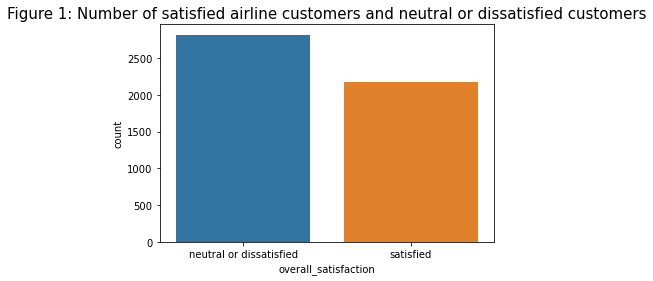

In [17]:
sns.countplot(x='overall_satisfaction',data=satis_df)

fig = plt.title('Figure 1: Number of satisfied airline customers and neutral or dissatisfied customers', fontsize = 15)

#### Bar Chart of most common class of flying

From Figure 2, we can see that the most common type of class opted by the customers of the airline is Business closely followed by Economic ('Eco') and Economic plus ('Eco Plus') being the least common choice based on the dataset. 

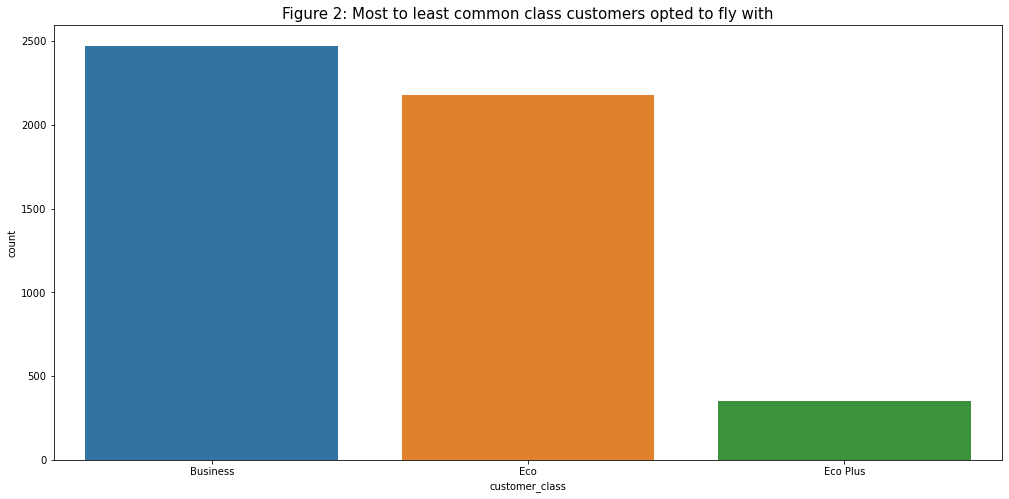

In [18]:
plt.figure(figsize = (17,8))
fig = sns.countplot(x = 'customer_class', data = satis_df, palette = None, 
                    order = satis_df['customer_class'].value_counts().index)
fig = plt.title('Figure 2: Most to least common class customers opted to fly with', fontsize = 15)
plt.show()

#### Onboard Service Satisfaction
This graph represents the passengers' satisfaction towards the onboard service. 
The data follows a left-skewed shape, indicating that the majority of the passengers believed this service was ideal to them.

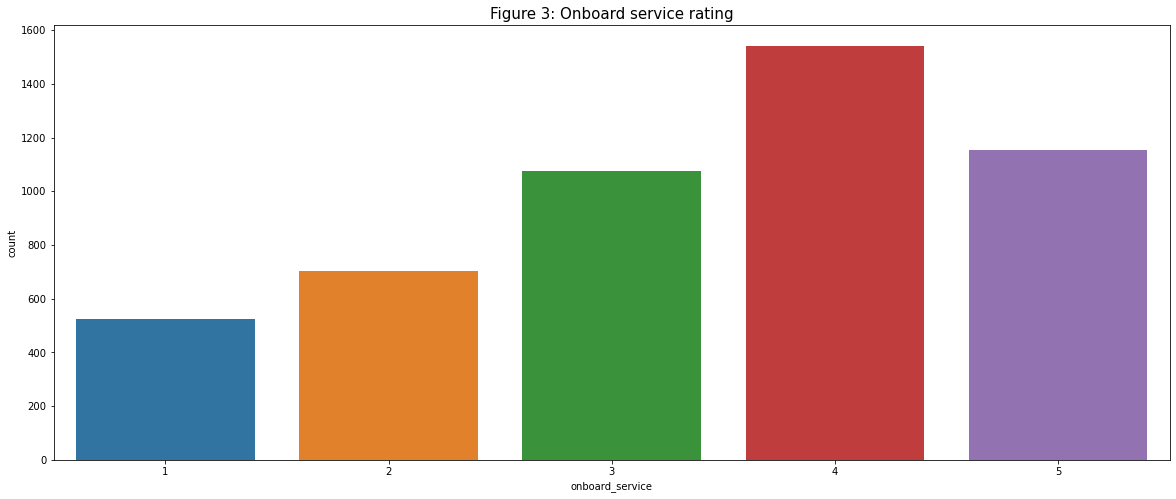

In [19]:
tot = satis_df['onboard_service'].sum()
plt.figure(figsize = (20,8))
fig = sns.countplot(x= 'onboard_service', data = satis_df)
plt.title('Figure 3: Onboard service rating', fontsize = 15)

plt.show()

#### Distribution of age using boxplot

This box plot represents the age distribution of our sample dataset. As from the graph, the majority age group is between 27 to 51, with the median age 40, minimum age less than 10 and maximum age over 80. This means that 50% of the passengers who have taken the survey are between the ages of 27 and 51.

Text(0.5, 1.0, 'Figure 4: Age distribution of Airline customers')

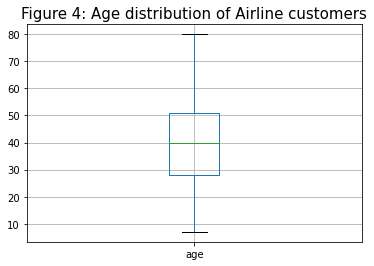

In [20]:
#Distribution of customers' age
boxplot = satis_df.boxplot(column = ['age'])
plt.title('Figure 4: Age distribution of Airline customers', fontsize = 15)


### Bivariate Visualisation

#### Box plot  representing how Airline's seat comfort service's affect the entertainment service.

A correlation can be found between the seat comfort service and the entertainment service, customers who were seated comfortably with a larger leg room are more likely to enjoy the entertainment service (and therefore provide a satisfactory overall response, which can be deduced from the next boxplot below)

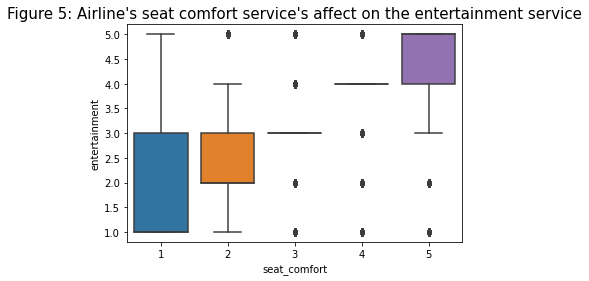

In [21]:
sns.boxplot(x='seat_comfort',y = 'entertainment',data=satis_df)
fig = plt.title('Figure 5: Airline\'s seat comfort service\'s affect on the entertainment service', fontsize = 15)


#### Box plot representing the influence of the entertainment service on the overall satisfaction.

Another correlation can be found between the entertainment service and the overall satisfaction, customers who receive a better entertainment services through out their journey are more likely to provide the airline a satisfactory response than the other group of customers who do not. The box plot below can be used to conclude that the airline's entertainment service clearly has an impact on the overall satisfaction.

<Figure size 1440x576 with 0 Axes>

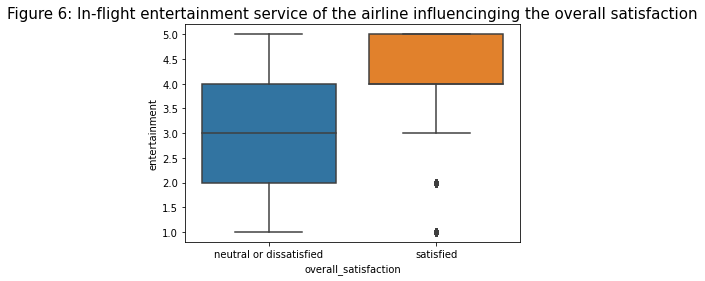

<Figure size 1440x576 with 0 Axes>

In [22]:
sns.boxplot(x='overall_satisfaction',y = 'entertainment',data=satis_df)
fig = plt.title('Figure 6: In-flight entertainment service of the airline influencinging the overall satisfaction', fontsize = 15)
plt.figure(figsize = (20,8))


In [23]:
print('Though it is unclear from the boxplot, the median satisfaction level\nregarding entertainment for passengers who were overall "satisfied" was {}.'.format(satis_df[satis_df['overall_satisfaction'] == 'satisfied']['entertainment'].median()))

Though it is unclear from the boxplot, the median satisfaction level
regarding entertainment for passengers who were overall "satisfied" was 4.0.


#### Line plot representing the relation between delay in departure and delay in arrival of the aeroplane.

A positive linear correlation can be seen between the departure delay and arrival delay of the aeroplane. The later the aeroplane departs, the later it arrives at its destination. Late departure usually means late arrival for obvious reasons unless the pilot can cover up the time and arrive on schedule despite departing late. The effect of these delays on the satisfaction rate response is discussed below in <a href='#fig14'>figure 14</a>

Text(0.5, 1.0, 'Figure 7: Relation between Delay in departure (in minutes) and delay in arrival (in minutes)')

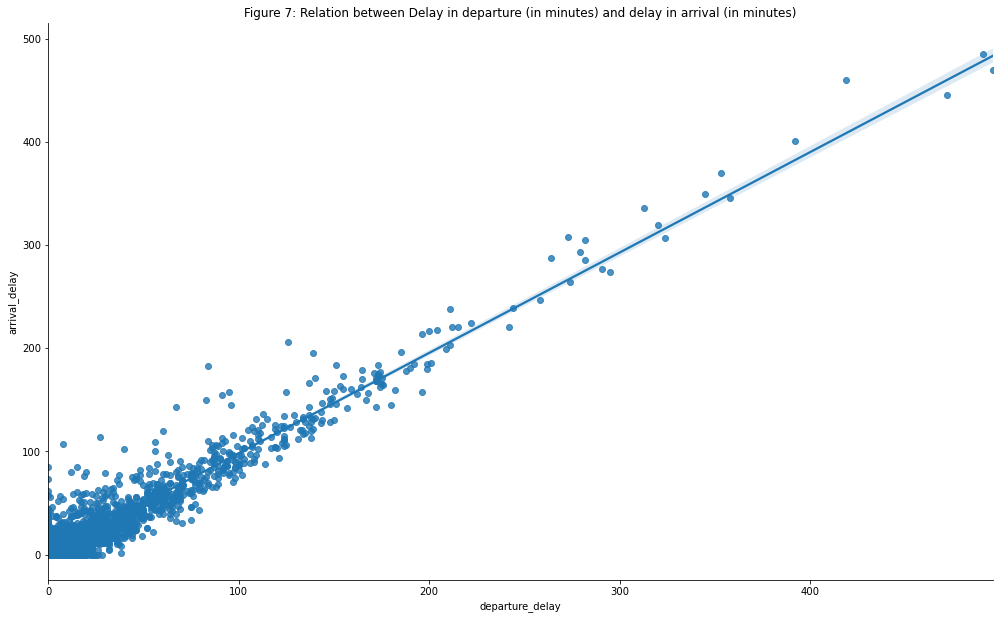

In [24]:
sns.lmplot(x='departure_delay',y='arrival_delay',data=satis_df, height=8.27, aspect=15/9)
plt.title('Figure 7: Relation between Delay in departure (in minutes) and delay in arrival (in minutes)')


#### Box plot of Cleanliness by Satisfaction

Generally speaking, a dirty and untidy enviroment can heavily affect customers' satisfaction. So the relation between customers' overall satisfaction and the cleanliness of airline is observed in order to find whether cleanilness is a relevant factor of customers' satisfaction. According to the box graph, it shows that both customers who either rated satistied or dissatisfied had similar ratings on the cleanilness of airline. The interquartile range of satisfied customers is 1 cleanliness rating higher than the interquartile range of neutral or dissatisfied cumstomers. As the graph suggests, ratings on the cleanliness can affect the over satisfaction as the higher the rating is, the more likelihood of customers to be satisfied.

Text(0.5, 1.0, 'Figure 8: Box plot of Cleanliness by Satisfaction')

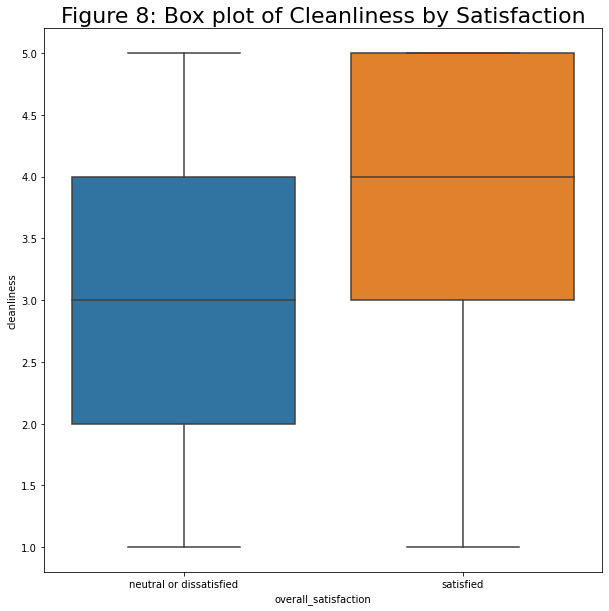

In [25]:
# Ignore Seaborn Warnings
import warnings
warnings.filterwarnings("ignore")

#relevance of online booking in overall satisfaction
plt.figure(figsize=(10,10))
sns.boxplot(satis_df['overall_satisfaction'],satis_df['cleanliness'], data = satis_df, notch = False)
plt.title('Figure 8: Box plot of Cleanliness by Satisfaction', fontsize = 22)

#### Box plot of online booking by Satisfaction

Online service is also considered to be a factor in relation with the customers' satisfaction. A box plot is used to represent the relation between customers' online booking rating and their overall satisfaction. According from the graph, the distribution of customers' rating for online booking is evenly spread, where the rating from customers who are overall neutral or dissatisfied is 1 rating lower than the customers who are overall satisfied. The spread of rating from neutral or dissatisfied customers are also sighlty tighter than the satisfied customers. Based on the graph, it depicts that the rating of online booking affects the overall satisfaction of customers as the average rating from neutral or dissatisfied customers is lower than the rating from satistied customers.

Text(0.5, 1.0, 'Figure 9: Box plot of online booking by Satisfaction')

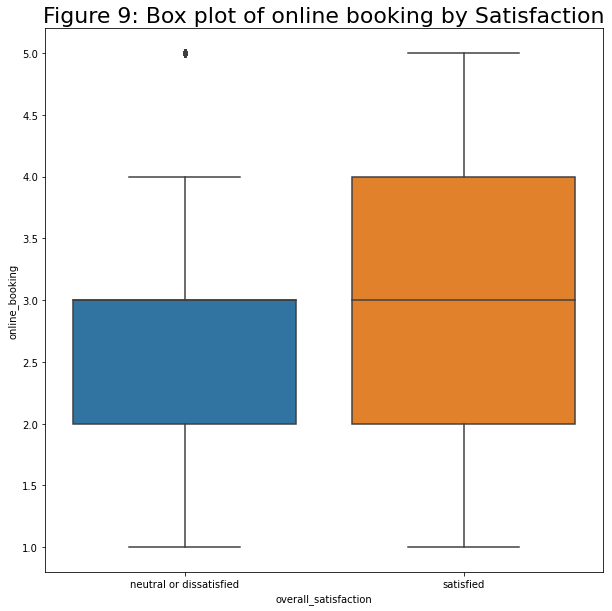

In [26]:
#relevance of cleanliness in overall satisfaction
plt.figure(figsize=(10,10))
sns.boxplot(satis_df['overall_satisfaction'],satis_df['online_booking'], data = satis_df, notch = False)
plt.title('Figure 9: Box plot of online booking by Satisfaction', fontsize = 22)

### Multi-variate Visualisation

#### Bar plot representing the effect of flying class on the overall satisfaction 

This bar plot shows how satisfied the customers are across the travel class. People traveling business class are the most satisfied customers, therefore, it can be concluded that a customer traveling business class is more likely to be satisfied with the airline service compared to the airline's economic and economic plus  customers.

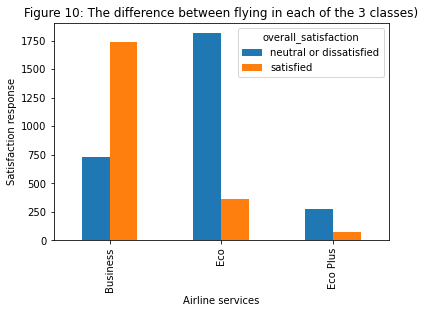

In [27]:
sample_df = satis_df
sample_df=sample_df.groupby(['customer_class','overall_satisfaction']).size()
sample_df=sample_df.unstack()
sample_df.plot(kind='bar')
plt.xlabel('Airline services')
plt.ylabel('Satisfaction response')
fig=plt.title('Figure 10: The difference between flying in each of the 3 classes)')


#### Bar Chart  representing customers satisfaction with each airline services 

With each bar in the graph representing an airline service, baggage handling was the highest rated service (average = 3.6) and the wifi servie was the least rated service (average = 2.7)

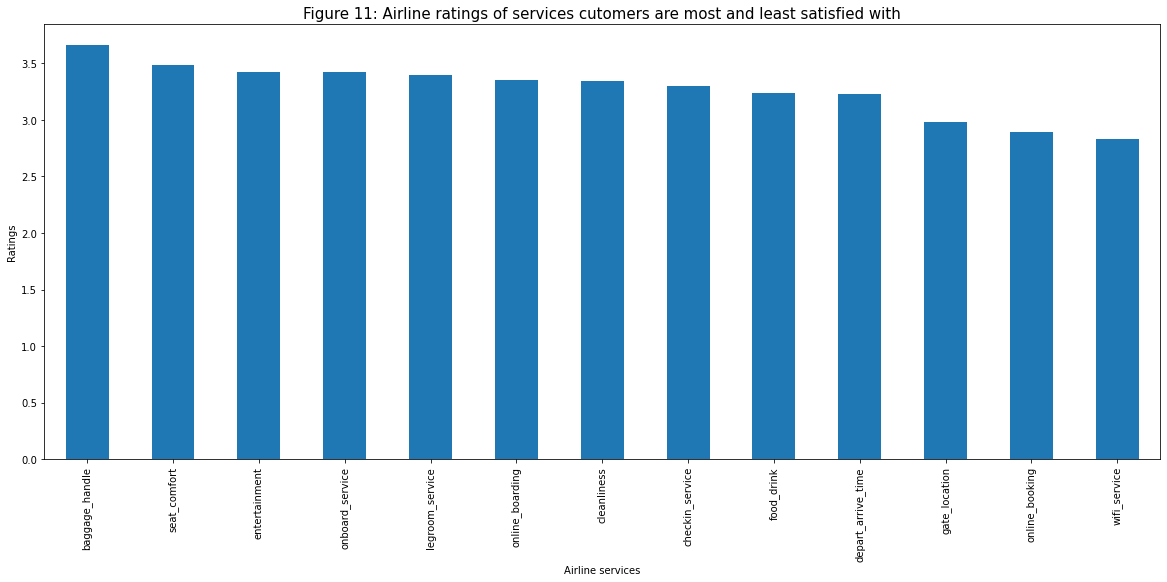

In [28]:
plt.figure(figsize = (20,8))

avg_satis_df = satis_df[['wifi_service',
       'depart_arrive_time', 'online_booking',
       'gate_location', 'food_drink', 'online_boarding', 'seat_comfort',
       'entertainment', 'onboard_service', 'legroom_service',
       'baggage_handle', 'checkin_service',
       'cleanliness']].mean().sort_values(ascending = False)

avg_satis_df.plot(kind='bar')
# avg_satis_df.plot(figsize=(20,10))
plt.rcParams["figure.figsize"] = (20, 10)
fig = plt.title('Figure 11: Airline ratings of services cutomers are most and least satisfied with', fontsize = 15)
 
plt.xlabel('Airline services')
plt.ylabel('Ratings')


plt.show()

#### Scatterplot representing the effect of delay in departure and arrival on the departure and arrival time convenience rating. 

This scatter plot can be used to see the impact of delays in departure and arrival on the on-boarding ratings. There does not seem to exist any strong relation between the delays and time convenience as one would expect. There are cases where the airline customer have had a long delay in departure or arrival and still provided a positive response for the departure and arrival time convenience section of the survey.

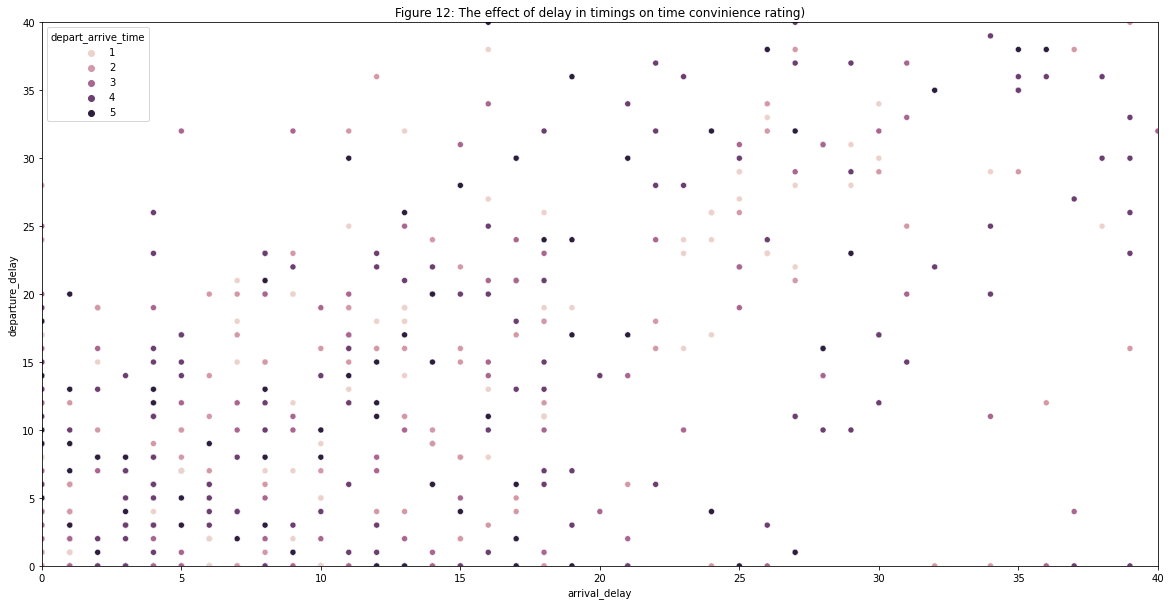

In [29]:
sampled = satis_df.sample(n=2000, random_state=9999)
sns.scatterplot(y='departure_delay',x='arrival_delay',hue = 'depart_arrive_time', data=sampled)
plt.xlim(0, 40)
plt.ylim(0, 40)
fig=plt.title('Figure 12: The effect of delay in timings on time convinience rating)')




#### Error bar graph representing the influence of customer class selection on satisfaction feedback in relation to the flight distance

This graph can be used to visualise the various satisfaction level depending upon the flight distance and flying class 

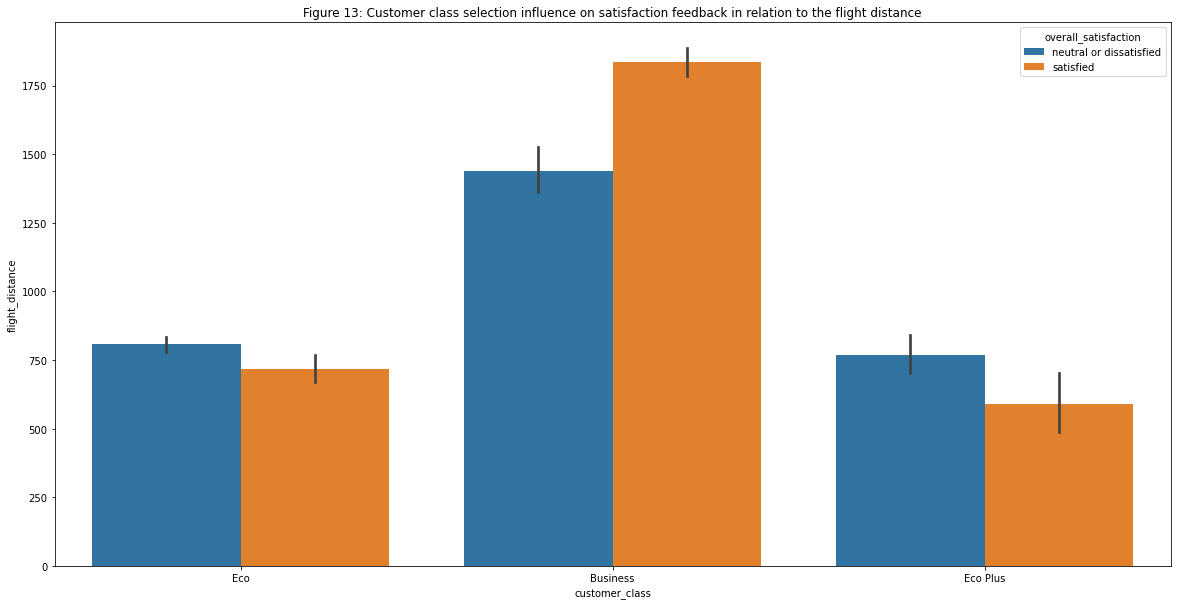

In [30]:
sns.barplot(hue ='overall_satisfaction', y ='flight_distance', x = 'customer_class'
, data = satis_df)
fig=plt.title('Figure 13: Customer class selection influence on satisfaction feedback in relation to the flight distance')



#### Scatterplot representing the influence on satisfaction levels based on time delays.

This graph can be used to visualise the various satisfaction level depending upon the delays in departure and arrival of the flight.

<a id='fig14'></a>

Text(0.5, 1.0, 'Figure 14: Scatterplot of Departure delay vs Arrival delay')

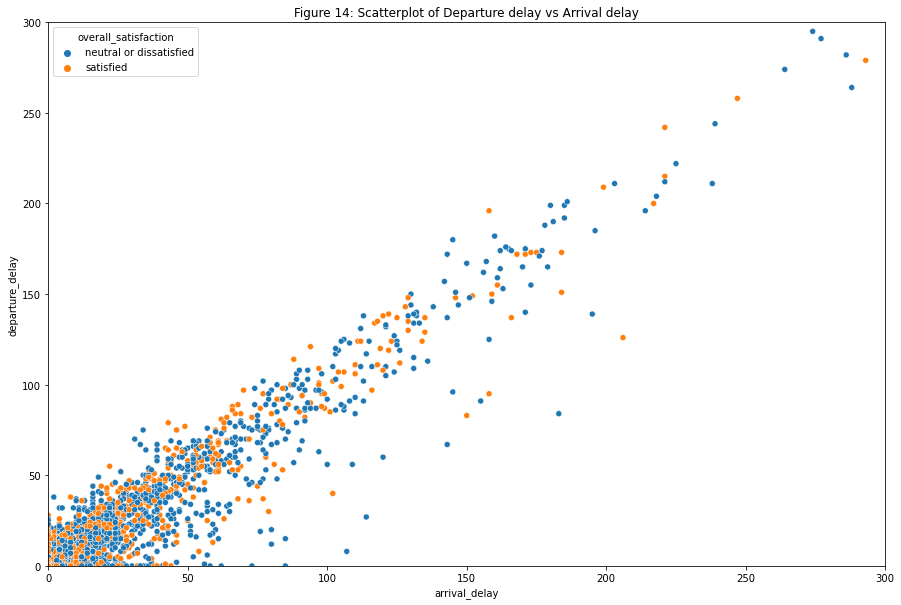

In [31]:
plt.figure(figsize=(15,10))
sns.scatterplot(y='departure_delay',x='arrival_delay',hue = 'overall_satisfaction', data=satis_df)
plt.xlim(0, 300)
plt.ylim(0, 300)

plt.title('Figure 14: Scatterplot of Departure delay vs Arrival delay')

## <center>Summary and Conclusion</center><a id='su'></a>

Being able to model how passengers respond to an airline's environment is exremely useful to understand what specific groups of passengers endure a negative experience, and what factors typically cause these issues. From this information, an airline can now focus their resources into imrpoving the services that appear to be diminishing the satisfaction of their passengers.

In order to increase overall productivity and have the highest quality information in our future decision-making, we first perform data cleaning to the The Airline passenger satisfaction dataset. After a thorough observation of the dataset, we first deleted the columns that are redundant and rename every columns for better readability. Then we checked missing values and outliers to make sure that extreme value does not pollute the overall dataset. Finally, the datatype of each features were also took into consideration and changed some of it for the better consistency and usability. After the data is cleaned, we randomly sampled 5000 rows and generated some visualisation from them. 

A range of data visualisations techniques were used visualise the dataset. The overall satisfaction feedback for the airline services was neutral or negative, with 2818 customers voting for neutral or dissatisfied and 2182 customers voting for a satisfied response. It can be easily concluded that the flying class the customers opted to fly with has a significant impact, meaning different classes correspond to different satisfaction levels with lower returning an overall negative response as opposed to upper business class.

### <center>References</center><a id='ref'></a>
* Klein, Timothy. Airline Passenger Satisfaction (Kaggle). Retrieved September 27, 2021 from https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction